In [1]:
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / "MEG" / "sample" / "sample_audvis_raw.fif"
# the preload flag loads the data into memory now
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw.crop(tmax=10.0)  # raw.crop() always happens in-place

Opening raw data file C:\Users\matth\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


c:\Users\matth\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Reading 0 ... 166799  =      0.000 ...   277.714 secs...


Measurement date,"December 03, 2002 19:01:10 GMT"
Experimenter,MEG
Participant,Unknown
Digitized points,146 points
Good channels,"203 Gradiometers, 102 Magnetometers, 9 Stimulus, 59 EEG, 1 EOG"
Bad channels,"MEG 2443, EEG 053"
EOG channels,EOG 061
ECG channels,Not available
Sampling frequency,600.61 Hz
Highpass,0.10 Hz
Lowpass,172.18 Hz


In [2]:
#Making a copy because apply_hilbert works inplace, editing the original file
original_raw = raw.copy()
raw.apply_hilbert()
print(
    f"original data type was {original_raw.get_data().dtype}, after "
    f"apply_hilbert the data type changed to {raw.get_data().dtype}."
)

original data type was float64, after apply_hilbert the data type changed to complex128.


In [ ]:
print(f'original data had {original_raw.info["nchan"]} channels.')
original_raw.pick("eeg")  # selects only the EEG channels
print(f'after picking, it has {original_raw.info["nchan"]} channels.')

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Created an SSP operator (subspace dimension = 3)
Using matplotlib as 2D backend.


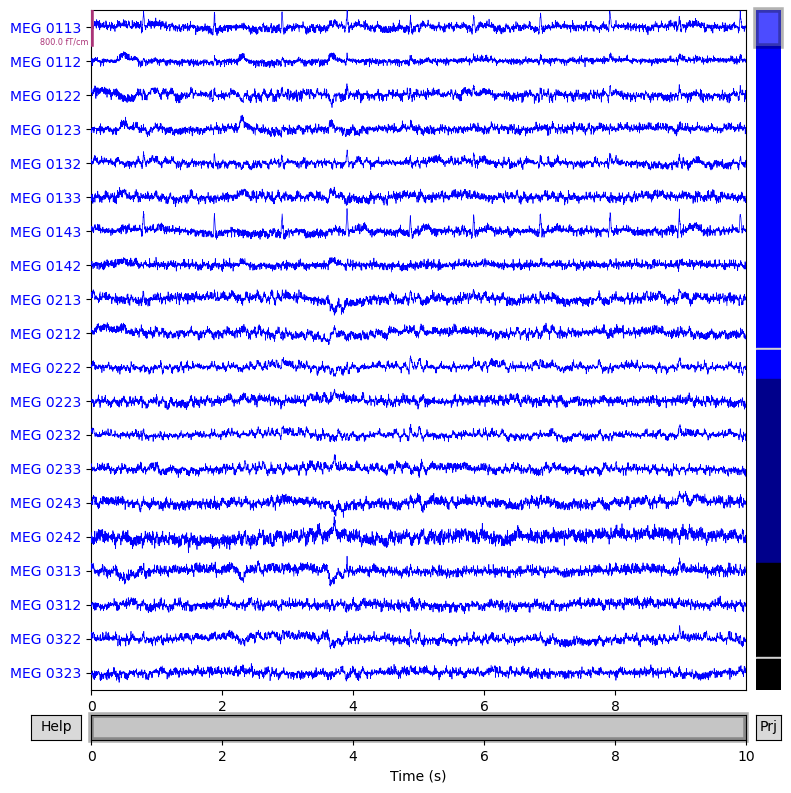

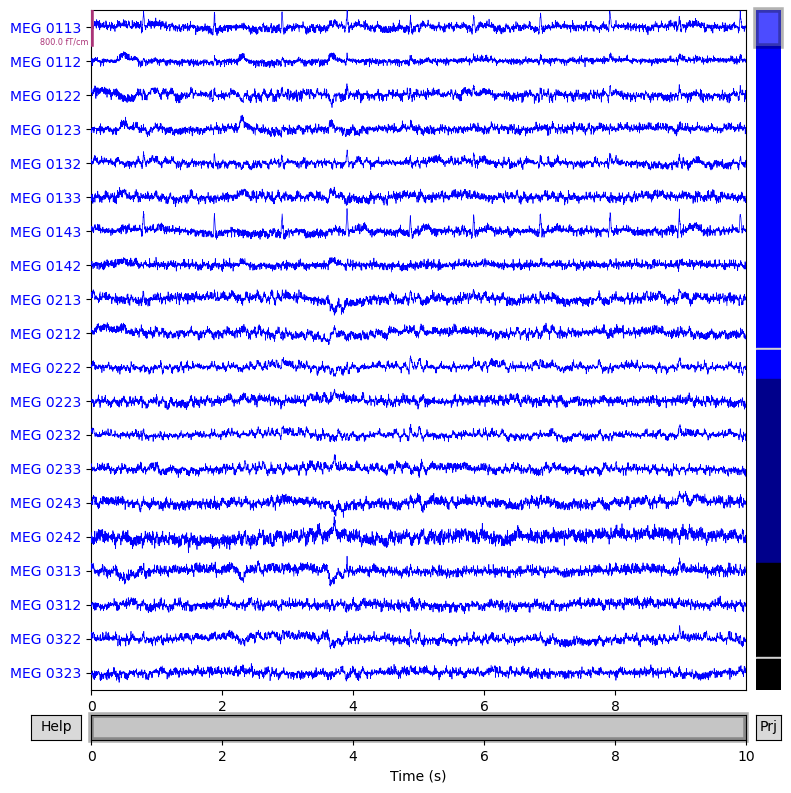

In [3]:
rereferenced_raw, ref_data = mne.set_eeg_reference(original_raw, ["EEG 003"], copy=True)
fig_orig = original_raw.plot()
fig_reref = rereferenced_raw.plot()